## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
# 請嘗試設定 GPU：os.environ
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = (x - x.mean())/(x.max() - x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(inpute_shape, output_units=10,num_neurous=[512, 256, 128, 64, 32, 16]):
    input_layer=keras.layers.Input(inpute_shape)
    
    for i,n in enumerate(num_neurous):
        if i ==0:
            x=keras.layers.Dense(units=n, activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            
        else:
            x=keras.layers.Dense(units=n, activation='relu',name='hidden_layer'+str(i+1))(x)
        
    output_layer=keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])    
    return model 

model= build_mlp(inpute_shape=x_train.shape[1:])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
_______

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 19s 382us/step - loss: 1.8128 - acc: 0.3633 - val_loss: 1.6226 - val_acc: 0.4239
Epoch 2/100
50000/50000 [==============================] - 16s 317us/step - loss: 1.5270 - acc: 0.4644 - val_loss: 1.4638 - val_acc: 0.4799
Epoch 3/100
50000/50000 [==============================] - 16s 318us/step - loss: 1.3866 - acc: 0.5117 - val_loss: 1.3987 - val_acc: 0.5110
Epoch 4/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.2838 - acc: 0.5479 - val_loss: 1.4037 - val_acc: 0.5110
Epoch 5/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.1975 - acc: 0.5806 - val_loss: 1.3407 - val_acc: 0.5278
Epoch 6/100
50000/50000 [==============================] - 16s 319us/step - loss: 1.1082 - acc: 0.6087 - val_loss: 1.3768 - val_acc: 0.5230
Epoch 7/

50000/50000 [==============================] - 15s 307us/step - loss: 0.1079 - acc: 0.9645 - val_loss: 3.4650 - val_acc: 0.5350
Epoch 46/100
50000/50000 [==============================] - 15s 308us/step - loss: 0.0879 - acc: 0.9699 - val_loss: 3.4900 - val_acc: 0.5369
Epoch 47/100
50000/50000 [==============================] - 15s 308us/step - loss: 0.1216 - acc: 0.9583 - val_loss: 3.3917 - val_acc: 0.5366
Epoch 48/100
50000/50000 [==============================] - 15s 306us/step - loss: 0.1137 - acc: 0.9625 - val_loss: 3.4388 - val_acc: 0.5329
Epoch 49/100
50000/50000 [==============================] - 16s 311us/step - loss: 0.1028 - acc: 0.9658 - val_loss: 3.5038 - val_acc: 0.5422
Epoch 50/100
50000/50000 [==============================] - 15s 306us/step - loss: 0.1091 - acc: 0.9640 - val_loss: 3.3785 - val_acc: 0.5338
Epoch 51/100
50000/50000 [==============================] - 15s 306us/step - loss: 0.0966 - acc: 0.9661 - val_loss: 3.4432 - val_acc: 0.5299
Epoch 52/100
50000/50000 [

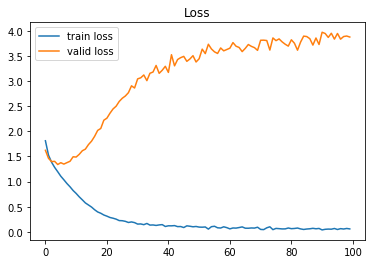

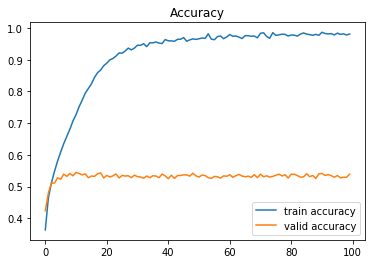

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()